Dataset dimensions: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sa

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


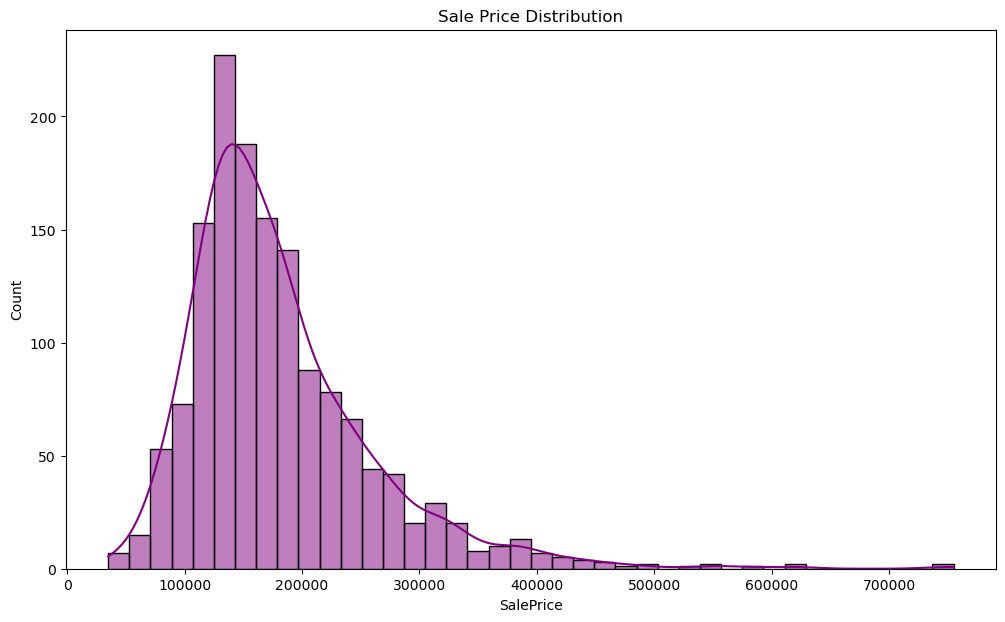

Training samples: 1022, Validation samples: 438
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Validation Mean Squared Error: 39799750656.00
Validation Mean Absolute Error: 181699.38


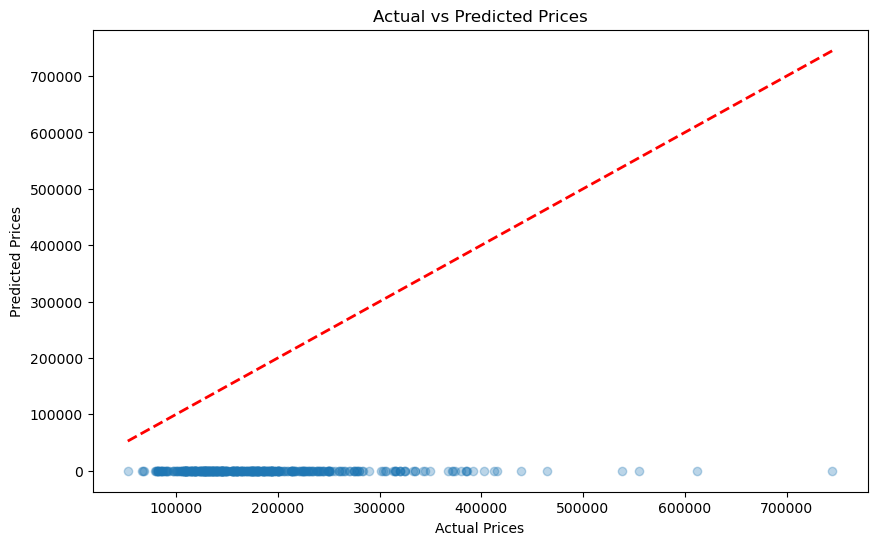

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     Id  SalePrice
0  1461 -21.110319
1  1462 -16.997118
2  1463  12.386406
3  1464  16.719715
4  1465   0.884913


In [8]:
# Step 1: Import Libraries and Load Data
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load and preview dataset
file_path = r"C:\Users\lenovo\Downloads\PRODIGY ML\HOUSE PREDICTION LR\train.csv"
dataset = pd.read_csv(file_path)
print("Dataset dimensions:", dataset.shape)
print(dataset.head())

# Step 2: Data Preprocessing
dataset.drop('Id', axis=1, inplace=True)
print(dataset.info())
print(dataset['SalePrice'].describe())
plt.figure(figsize=(12, 7))
sns.histplot(dataset['SalePrice'], kde=True, color='purple', bins=40)
plt.title('Sale Price Distribution')
plt.show()

# Step 3: Handle Missing Values
numeric_features = dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice']).columns
imputer = SimpleImputer(strategy='mean')
dataset[numeric_features] = imputer.fit_transform(dataset[numeric_features])

# Step 4: Split the Dataset
train_set, val_set = train_test_split(dataset, test_size=0.3, random_state=0)
X_train = train_set[numeric_features]
y_train = train_set['SalePrice']
X_val = val_set[numeric_features]
y_val = val_set['SalePrice']
print(f"Training samples: {train_set.shape[0]}, Validation samples: {val_set.shape[0]}")

# Step 5: Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 6: Define and Train the Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Step 7: Evaluate the Model
y_pred = model.predict(X_val).flatten()
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()
mse.update_state(y_val, y_pred)
mae.update_state(y_val, y_pred)
print(f"Validation Mean Squared Error: {mse.result().numpy():.2f}")
print(f"Validation Mean Absolute Error: {mae.result().numpy():.2f}")

# Step 8: Plot Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Step 9: Predict and Prepare Submission
test_path = r"C:\Users\lenovo\Downloads\PRODIGY ML\HOUSE PREDICTION LR\test.csv"
test_data = pd.read_csv(test_path)
submission_ids = test_data.pop('Id')
test_data[numeric_features] = imputer.transform(test_data[numeric_features])
X_test = scaler.transform(test_data[numeric_features])
predicted_prices = model.predict(X_test).flatten()

submission_df = pd.DataFrame({"Id": submission_ids, "SalePrice": predicted_prices})
submission_df.to_csv('submission_lr_v1.csv', index=False)
print(submission_df.head())
